In [199]:
import sys,os
folder_name="march_madness"
BASE_DIR=os.path.abspath(".").split(folder_name)[0]+folder_name
DATA_ROOT=os.path.join(BASE_DIR,"data")
#todo setup shared utilities folder
sys.path.insert(0, DATA_ROOT)

In [200]:
import pandas as pd
pd.options.display.max_columns=999
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [201]:
regular_season_results_df=pd.read_csv(DATA_ROOT+"/DataFiles/RegularSeasonDetailedResults.csv")
regular_season_results_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [202]:
teams=pd.read_csv(DATA_ROOT+"/DataFiles/Teams.csv")
team_conferences=pd.read_csv(DATA_ROOT+"/DataFiles/TeamConferences.csv")#contains season

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB8EE84978>]],
      dtype=object)

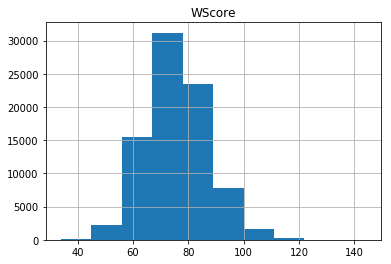

In [203]:
#try skellam?
regular_season_results_df[['WScore']].hist()

In [204]:
regular_season_results_df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [205]:
import featuretools as ft

In [206]:
es_mc = ft.demo.load_mock_customer(return_entityset=True, random_seed=0)
es_mc['transactions'].df.head()

,transaction_id,session_id,transaction_time,amount,product_id
298,298,1,2014-01-01 00:00:00,127.64,5
2,2,1,2014-01-01 00:01:05,109.48,2
308,308,1,2014-01-01 00:02:10,95.06,3
116,116,1,2014-01-01 00:03:15,78.92,4
371,371,1,2014-01-01 00:04:20,31.54,3


In [207]:
es_mc

Entityset: transactions
  Entities:
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 4]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

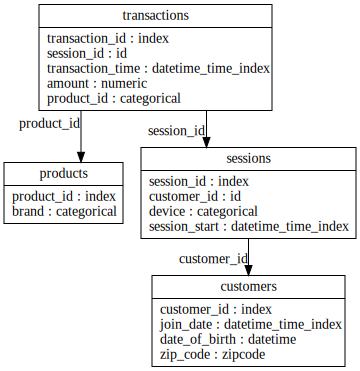

In [208]:
es_mc.plot()

In [209]:
fm, features = ft.dfs(entityset=es_mc,
                     target_entity="customers"
                     )

In [210]:
features

[<Feature: zip_code>,
 <Feature: COUNT(sessions)>,
 <Feature: NUM_UNIQUE(sessions.device)>,
 <Feature: MODE(sessions.device)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: COUNT(transactions)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: DAY(join_date)>,
 <Feature: DAY(date_of_birth)>,
 <Feature: YEAR(join_date)>,
 <Feature: YEAR(date_of_birth)>,
 <Feature: MONTH(join_date)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: WEEKDAY(join_date)>,
 <Feature: WEEKDAY(date_of_birth)>,
 <Feature: SUM(sessions.STD(transactions.amount))>,
 <Feature: SUM(sessions.MAX(transactions.amount))>,
 <Feature: SUM(sessions.SKEW(transactions.amount))>,
 <Feature: SUM(sessions.MIN(transactions.amount))>,
 <Feature: SUM(sessions.MEAN(transactions.amount))>,
 <

In [215]:
fm

,zip_code,COUNT(sessions),NUM_UNIQUE(sessions.device),MODE(sessions.device),SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),COUNT(transactions),NUM_UNIQUE(transactions.product_id),MODE(transactions.product_id),DAY(join_date),DAY(date_of_birth),YEAR(join_date),YEAR(date_of_birth),MONTH(join_date),MONTH(date_of_birth),WEEKDAY(join_date),WEEKDAY(date_of_birth),SUM(sessions.STD(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),STD(sessions.SUM(transactions.amount)),STD(sessions.MAX(transactions.amount)),STD(sessions.SKEW(transactions.amount)),STD(sessions.MIN(transactions.amount)),STD(sessions.MEAN(transactions.amount)),STD(sessions.COUNT(transactions)),STD(sessions.NUM_UNIQUE(transactions.product_id)),MAX(sessions.SUM(transactions.amount)),MAX(sessions.STD(transactions.amount)),MAX(sessions.SKEW(transactions.amount)),MAX(sessions.MIN(transactions.amount)),MAX(sessions.MEAN(transactions.amount)),MAX(sessions.COUNT(transactions)),MAX(sessions.NUM_UNIQUE(transactions.product_id)),SKEW(sessions.SUM(transactions.amount)),SKEW(sessions.STD(transactions.amount)),SKEW(sessions.MAX(transactions.amount)),SKEW(sessions.MIN(transactions.amount)),SKEW(sessions.MEAN(transactions.amount)),SKEW(sessions.COUNT(transactions)),SKEW(sessions.NUM_UNIQUE(transactions.product_id)),MIN(sessions.SUM(transactions.amount)),MIN(sessions.STD(transactions.amount)),MIN(sessions.MAX(transactions.amount)),MIN(sessions.SKEW(transactions.amount)),MIN(sessions.MEAN(transactions.amount)),MIN(sessions.COUNT(transactions)),MIN(sessions.NUM_UNIQUE(transactions.product_id)),MEAN(sessions.SUM(transactions.amount)),MEAN(sessions.STD(transactions.amount)),MEAN(sessions.MAX(transactions.amount)),MEAN(sessions.SKEW(transactions.amount)),MEAN(sessions.MIN(transactions.amount)),MEAN(sessions.MEAN(transactions.amount)),MEAN(sessions.COUNT(transactions)),MEAN(sessions.NUM_UNIQUE(transactions.product_id)),NUM_UNIQUE(sessions.MODE(transactions.product_id)),NUM_UNIQUE(sessions.DAY(session_start)),NUM_UNIQUE(sessions.YEAR(session_start)),NUM_UNIQUE(sessions.MONTH(session_start)),NUM_UNIQUE(sessions.WEEKDAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.DAY(session_start)),MODE(sessions.YEAR(session_start)),MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start))
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60091,8,3,mobile,9025.62,40.442059,139.43,0.019698,5.81,71.631905,126,5,4,17,18,2011,1994,4,7,6,0,312.745952,1057.97,-0.476122,78.59,582.193117,40,279.510713,7.322191,0.589386,6.954507,13.759314,4.062019,0.000000,1613.93,46.905665,0.640252,26.36,88.755625,25,5,0.778170,-0.312355,-0.780493,2.440005,-0.424949,1.946018,0.000000,809.97,30.450261,118.90,-1.038434,50.623125,12,5,1128.202500,39.093244,132.246250,-0.059515,9.823750,72.774140,15.750000,5.000000,4,1,1,1,1,4,1,2014,1,2
2,13244,7,3,desktop,7200.28,37.705178,146.81,0.098259,8.73,77.422366,93,5,4,15,18,2012,1986,4,8,6,0,258.700528,931.63,-0.277640,154.60,548.905851,35,251.609234,17.221593,0.509798,15.874374,11.477071,3.450328,0.000000,1320.64,47.935920,0.755711,56.46,96.581000,18,5,-0.440929,0.013087,-1.539467,2.154929,0.235296,-0.303276,0.000000,634.84,27.839228,100.04,-0.763603,61.910000,8,5,1028.611429,36.957218,133.090000,-0.039663,22.085714,78.415122,13.285714,5.000000,4,1,1,1,1,3,1,2014,1,2
3,13244,6,3,desktop,6236.62,43.683296,149.15,0.418230,5.89,67.060430,93,5,1,13,21,2011,2003,8,11,5,4,257.299895,847.63,2.286086,66.21,405.237462,29,219.021420,10.724241,0.429374,5.424407,11.174282,2.428992,0.408248,1477.97,50.110120,0.854976,20.06,82.109444,18,5,2.246479,-0.245703,-0.941078,1.000771,0.678544,-1.507217,-2.449490,889.21,35.704680,126.74,-0.289466,55.579412,

# Naive Model to Test Submission File

In [216]:
from itertools import combinations

In [1]:
tourney_seeds=pd.read_csv(DATA_ROOT+"/DataFiles/NCAATourneySeeds.csv")
possible_games_df=pd.DataFrame()
for season, seeds in tourney_seeds.groupby("Season"):
    possible_games=list(combinations(tourney_seeds[tourney_seeds['Season']==season]['TeamID'],2))
    df=pd.DataFrame(possible_games)
    df['Season']=season
    possible_games_df=possible_games_df.append(df)
possible_games_df['ID']=possible_games_df.apply(lambda row: "%s_%s_%s"%(row['Season'],min([row[0],row[1]]),max([row[0],row[1]])), axis=1)

NameError: name 'pd' is not defined

In [218]:
possible_games_df['Pred']=0.5

In [219]:
submission=possible_games_df[possible_games_df['Season']>=2014][['ID','Pred']]
submission.to_csv("submission.csv",index=False)

In [220]:
len(submission)

11390

In [221]:
#submission most have id with team ID's ordered from lowest to highest

# Initial FeatureSet Integration
1 entity (regular season games)  
then try with conferences using a team_id and season_link (can it be compound key?)

In [226]:
#using https://towardsdatascience.com/automated-feature-engineering-for-predictive-modeling-d8c9fa4e478b as a starting point
#interface looks a little old so I am using the current FT docs too
from sklearn.linear_model import LogisticRegression

In [225]:
regular_season_results_df.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,game_index,game_datetime
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,200310_11041328,2003-01-11
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,200310_12721393,2003-01-11
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,200311_12661437,2003-01-12
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,200311_12961457,2003-01-12
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,200311_14001208,2003-01-12


In [224]:
import datetime
def get_game_index(row):
    return "%s%s_%s%s"%(row['Season'],row['DayNum'],row['WTeamID'],row['LTeamID'])


def get_game_daytime(row):
    #not an acutal "day". This uses Season and DayNum without a first day to index the day_num
    
    base_day=datetime.datetime(row['Season'],1,1)
    game_day=base_day+datetime.timedelta(days=row['DayNum'])
    return game_day
    
regular_season_results_df['game_index']=regular_season_results_df.apply(get_game_index, axis=1)
regular_season_results_df['game_datetime']=regular_season_results_df.apply(get_game_daytime, axis=1)

In [227]:
#todo create dynamic id builder
def get_team_season_id(row):
    return "%s_%s"%(row['Season'],row['TeamID'])
team_conferences['team_season_id']=team_conferences.apply(get_team_season_id, axis=1)

In [228]:
#TODO need to split results into team_game_logs

In [229]:
regular_season_results_df.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'game_index', 'game_datetime'],
      dtype='object')

In [230]:
game=regular_season_results_df.iloc[0]
def get_team_game_log(results_df,winner=True):
    team_game_log=regular_season_results_df.copy()
    prefixes=["team_","opp_"]
    if not winner:
        prefixes=["opp_","team_"]
    rename_dict={}
    for col in regular_season_results_df.columns:
        if col=="WLoc":
            continue
        elif col.startswith("W"):
            rename_dict[col]=prefixes[0]+col[1:]
        elif col.startswith("L") and col not in ["Loc"]:
            rename_dict[col]=prefixes[1]+col[1:]
    team_game_log=team_game_log.rename(columns=rename_dict)
    return team_game_log
winner_games=get_team_game_log(regular_season_results_df, winner=True)
loser_games=get_team_game_log(regular_season_results_df, winner=False)
team_game_log=pd.concat([winner_games,loser_games],sort=False)
team_game_log=team_game_log.sort_values(by=["Season","DayNum","game_index"])
team_game_log['team_margin']=team_game_log['team_Score']-team_game_log['opp_Score']
team_game_log['team_won']=team_game_log['team_margin']>0
#teams can't tie in basketball, above code assumes that
assert(len(team_game_log[team_game_log['team_margin']==0])==0)

In [231]:
def get_game_loc(row):
    if row['team_won']:
        return row['WLoc']
    else:
        if row['WLoc']=='H':
            return 'A'
        elif row['WLoc']=='A':
            return 'H'
        else:
            return row['WLoc']
team_game_log['game_loc']=team_game_log.apply(get_game_loc,axis=1)
del team_game_log['WLoc']
def get_team_game_index(row):
    return "%s%s_%s_%s"%(row['Season'],row['DayNum'],row['team_TeamID'],row['opp_TeamID'])
team_game_log['team_game_index']=team_game_log.apply(get_team_game_index, axis=1)

def get_team_season_index_from_games(row):
    return "%s_%s"%(row['Season'],row['team_TeamID'])
team_game_log['team_season_id']=team_game_log.apply(get_team_season_index_from_games, axis=1)

In [268]:
season=2016
es = ft.EntitySet()
#compound key index?
es = es.entity_from_dataframe(entity_id="team_game_log",
                             dataframe=team_game_log[team_game_log['Season']==season].drop(["game_index"],axis=1),
                              index="team_game_index",
                              time_index="game_datetime",
                              
                             )


# es = es.entity_from_dataframe(entity_id="team_conferences",
#                              dataframe=team_conferences[team_conferences['Season']==season],
#                               index="team_season_id"
#                              )
# es = es.add_relationship(
#     ft.Relationship(
#                     es['team_conferences']['team_season_id'], 
#                     es['team_game_log']['team_season_id']
#                    )
# )

In [269]:
es['team_game_log']

Entity: team_game_log
  Variables:
    team_game_index (dtype: index)
    Season (dtype: numeric)
    DayNum (dtype: numeric)
    team_TeamID (dtype: numeric)
    team_Score (dtype: numeric)
    opp_TeamID (dtype: numeric)
    opp_Score (dtype: numeric)
    NumOT (dtype: numeric)
    team_FGM (dtype: numeric)
    team_FGA (dtype: numeric)
    team_FGM3 (dtype: numeric)
    team_FGA3 (dtype: numeric)
    team_FTM (dtype: numeric)
    team_FTA (dtype: numeric)
    team_OR (dtype: numeric)
    team_DR (dtype: numeric)
    team_Ast (dtype: numeric)
    team_TO (dtype: numeric)
    team_Stl (dtype: numeric)
    team_Blk (dtype: numeric)
    team_PF (dtype: numeric)
    opp_FGM (dtype: numeric)
    opp_FGA (dtype: numeric)
    opp_FGM3 (dtype: numeric)
    opp_FGA3 (dtype: numeric)
    opp_FTM (dtype: numeric)
    opp_FTA (dtype: numeric)
    opp_OR (dtype: numeric)
    opp_DR (dtype: numeric)
    opp_Ast (dtype: numeric)
    opp_TO (dtype: numeric)
    opp_Stl (dtype: numeric)
    opp_Blk (

In [281]:

feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="team_game_log",
                                      verbose=True
                                     )


Built 41 features
Elapsed: 00:02 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [282]:
from importlib import reload
reload(utils)
#pruned_feature_matrix=utils.remove_low_information_features(feature_matrix)

<module 'utils' from 'C:\\Users\\MatteoHoch\\Documents\\projects\\freelance\\upwork\\feature_labs\\march_madness\\notebooks\\utils.py'>

In [283]:
# encode categorical values
fm_encoded, features_encoded = ft.encode_features(feature_matrix,
                                                  feature_defs)

print("Number of features %s" % len(features_encoded))
fm_encoded.head(10)

Number of features 77


,Season,DayNum,team_TeamID,team_Score,opp_TeamID,opp_Score,NumOT,team_FGM,team_FGA,team_FGM3,team_FGA3,team_FTM,team_FTA,team_OR,team_DR,team_Ast,team_TO,team_Stl,team_Blk,team_PF,opp_FGM,opp_FGA,opp_FGM3,opp_FGA3,opp_FTM,opp_FTA,opp_OR,opp_DR,opp_Ast,opp_TO,opp_Stl,opp_Blk,opp_PF,team_margin,team_won,game_loc = H,game_loc = A,game_loc = N,game_loc is unknown,team_season_id = 2016_1330,team_season_id = 2016_1290,team_season_id = 2016_1452,team_season_id = 2016_1437,team_season_id = 2016_1433,team_season_id = 2016_1408,team_season_id = 2016_1401,team_season_id = 2016_1397,team_season_id = 2016_1386,team_season_id = 2016_1345,team_season_id is unknown,DAY(game_datetime) = 20,DAY(game_datetime) = 27,DAY(game_datetime) = 6,DAY(game_datetime) = 2,DAY(game_datetime) = 13,DAY(game_datetime) = 9,DAY(game_datetime) = 16,DAY(game_datetime) = 4,DAY(game_datetime) = 23,DAY(game_datetime) = 30,DAY(game_datetime) is unknown,YEAR(game_datetime) = 2016,YEAR(game_datetime) is unknown,MONTH(game_datetime) = 3,MONTH(game_datetime) = 4,MONTH(game_datetime) = 1,MONTH(game_datetime) = 2,MONTH(game_datetime) = 5,MONTH(game_datetime) is unknown,WEEKDAY(game_datetime) = 2,WEEKDAY(game_datetime) = 0,WEEKDAY(game_datetime) = 6,WEEKDAY(game_datetime) = 5,WEEKDAY(game_datetime) = 4,WEEKDAY(game_datetime) = 1,WEEKDAY(game_datetime) = 3,WEEKDAY(game_datetime) is unknown
team_game_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016100_1102_1305,2016,100,1102,52,1305,72,0,20,60,3,18,9,15,13,15,8,9,6,3,17,25,48,5,17,17,20,10,31,13,16,4,6,17,-20,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2016100_1104_1401,2016,100,1104,63,1401,62,0,22,55,8,25,11,16,14,22,10,13,12,3,21,19,45,8,17,16,23,8,21,8,13,6,2,18,1,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2016100_1110_1131,2016,100,1110,51,1131,71,0,20,48,3,20,8,9,5,15,12,16,6,1,17,22,42,8,14,19,23,7,23,12,18,9,2,13,-20,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2016100_1122_1183,2016,100,1122,79,1183,70,0,26,57,4,16,23,30,15,27,15,11,6,2,11,27,62,9,28,7,8,9,18,18,10,4,5,22,9,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2016100_1124_1243,2016,100,1124,82,1243,72,0,23,47,7,13,29,30,6,19,16,15,8,6,19,25,64,2,14,20,23,19,16,13,16,8,2,23,10,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2016100_1125_1240,2016,100,1125,81,1240,73,0,31,58,12,22,7,14,11,21,21,10,5,1,17,25,46,8,20,15,18,2,22,17,13,3,4,18,8,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2016100_1129_1161,2016,100,1129,93,1161,97,2,29,65,18,35,17,22,4,30,18,11,8,2,30,28,66,11,31,30,41,13,36,14,11,5,4,22,-4,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2016100_1131_1110,2016,100,1131,71,1110,51,0,22,42,8,14,19,23,7,23,12,18,9,2,13,20,48,3,20,8,9,5,15,12,16,6,1,17,20,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2016100_1133_1260,2016,100,1133,43,1260,54,0,17,58,3,20,6,17,15,32,10,14,4,1,20,19,51,3,12,13,21,5,33,8,10,7,3,19,-11,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [265]:
y=fm_encoded['team_won']
for col in cols:
    if col in fm_encoded:
        fm_encoded=fm_encoded.drop([col],axis=1)
X=fm_encoded.fillna(0)


In [266]:
from sklearn.ensemble import *
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=400, n_jobs=-1)
scores = cross_val_score(estimator=clf,X=X, y=y, cv=3,
                         scoring="roc_auc", verbose=True)

"AUC %.2f +/- %.2f" % (scores.mean(), scores.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s finished


'AUC 0.69 +/- 0.02'

In [284]:
import utils

clf.fit(X, y)
utils.feature_importances(clf, features_encoded, n=300)

1: Feature: Season, 0.052
2: Feature: DayNum, 0.048
3: Feature: opp_TO, 0.046
4: Feature: opp_Ast, 0.045
5: Feature: team_won, 0.042
6: Feature: opp_FTA, 0.041
7: Feature: opp_Stl, 0.036
8: Feature: opp_Blk, 0.035
9: Feature: game_loc = H, 0.031
10: Feature: game_loc = A, 0.030
11: Feature: team_season_id = 2016_1290, 0.024
12: Feature: team_season_id = 2016_1330, 0.023
13: Feature: game_loc = N, 0.022
14: Feature: game_loc is unknown, 0.022
15: Feature: team_Ast, 0.020
16: Feature: team_TO, 0.019
17: Feature: opp_PF, 0.019
18: Feature: team_Stl, 0.017
19: Feature: opp_FGA, 0.017
20: Feature: team_Blk, 0.016
21: Feature: team_TeamID, 0.016
22: Feature: opp_FGM, 0.016
23: Feature: opp_FGA3, 0.016
24: Feature: opp_FTM, 0.015
25: Feature: team_PF, 0.015
26: Feature: opp_FGM3, 0.013
27: Feature: DAY(game_datetime) = 23, 0.005
28: Feature: YEAR(game_datetime) is unknown, 0.005
29: Feature: WEEKDAY(game_datetime) = 2, 0.004
30: Feature: WEEKDAY(game_datetime) = 0, 0.004
31: Feature: DAY(game

[<Feature: Season>,
 <Feature: DayNum>,
 <Feature: opp_TO>,
 <Feature: opp_Ast>,
 <Feature: team_won>,
 <Feature: opp_FTA>,
 <Feature: opp_Stl>,
 <Feature: opp_Blk>,
 <Feature: game_loc = H>,
 <Feature: game_loc = A>,
 <Feature: team_season_id = 2016_1290>,
 <Feature: team_season_id = 2016_1330>,
 <Feature: game_loc = N>,
 <Feature: game_loc is unknown>,
 <Feature: team_Ast>,
 <Feature: team_TO>,
 <Feature: opp_PF>,
 <Feature: team_Stl>,
 <Feature: opp_FGA>,
 <Feature: team_Blk>,
 <Feature: team_TeamID>,
 <Feature: opp_FGM>,
 <Feature: opp_FGA3>,
 <Feature: opp_FTM>,
 <Feature: team_PF>,
 <Feature: opp_FGM3>,
 <Feature: DAY(game_datetime) = 23>,
 <Feature: YEAR(game_datetime) is unknown>,
 <Feature: WEEKDAY(game_datetime) = 2>,
 <Feature: WEEKDAY(game_datetime) = 0>,
 <Feature: DAY(game_datetime) = 16>,
 <Feature: DAY(game_datetime) = 30>,
 <Feature: DAY(game_datetime) is unknown>,
 <Feature: MONTH(game_datetime) = 2>,
 <Feature: WEEKDAY(game_datetime) = 4>,
 <Feature: MONTH(game_datet

In [197]:
lr = LogisticRegression()
model = lr.fit(X, y)
model.score(X, y)

C:\Users\MatteoHoch\Anaconda3\envs\march_madness\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6967777984727137

# FT Ideas
- Seasonal data?  Will the "Training window" work? https://docs.featuretools.com/automated_feature_engineering/handling_time.html#training-window-and-the-last-time-index
- Compound key?  
- win record? should I try to prep data so FT will create it and the derived fields like last 10 games? Or code manually?
- oppositional data? In the past I've done home_team, home_opp, away_team,away_opp (team and opp loosely correspond to OFF and DEF).

# Go Through Tuning
https://docs.featuretools.com/guides/tuning_dfs.html  
conferences are "interesting_values"  
go deeper into the primitives (can I create a percentage primitive?)

# Feature Ideas
Calculate OFF Rating,  
DEF Rating,  
Net rating.  
https://www.kaggle.com/pozz13/ncaa-2k19-eda-zion-s-kingdom shows net_rating_mean as a good feature.  
  
Model games with noise and rankings systems (seeds) as fuzzy. Middle seeds vary a lot in terms of true ranking.  
Non-Elo approach https://www.kaggle.com/raddar/team-power-rankings   
Basketball Advanced Stat Gloassary https://www.basketball-reference.com/about/glossary.html https://www.kaggle.com/bshyammm/starter-kernel-with-model-tune-using-fastai  